In [ ]:
#Python intoduction from dataquest https://www.dataquest.io/blog/python-pandas-databases/

In [2]:
import sqlite3
import pandas as pd

# connect to database object
db = sqlite3.connect('flights.db')

In [3]:
def run_query(query):
    return pd.read_sql_query(query, db) # this is a really useful function for taking care of random intermediate commands

In [5]:
# Want to see what tables are in the database

query = '''
SELECT name 
FROM sqlite_master 
WHERE type='table';
'''

run_query(query)

,name
0,airports
1,airlines
2,routes


In [6]:
# Show first 5 rows of airlines table to see fields

query = '''
SELECT * 
FROM airlines
LIMIT 5;
'''

run_query(query)

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [ ]:
# Questions:

# What are:
# iata
# icao
# callsign

In [7]:
# Show first 5 rows of airports table to see fields

query = '''
SELECT * 
FROM airports
LIMIT 5;
'''

run_query(query)

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.7887,20,10,U,Pacific/Port_Moresby
2,2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.22005,146,10,U,Pacific/Port_Moresby


In [ ]:
# Questions:
    
# What are:
# icao
# offset
# dst

In [8]:
# Show first 5 rows of routes table to see fields

query = '''
SELECT * 
FROM routes
LIMIT 5;
'''

run_query(query)

,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,0,2B,410,AER,2965,KZN,2990,None,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,None,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,None,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,None,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,None,0,CR2


In [ ]:
# Questions

# What is:
# codeshare

In [ ]:
# How do the tables link?

# route <-> airline : unique airline id in both
# route <-> airport : source and destination id in route correspond to id in airport
# airport <-> airline : both have icao field, but not sure what this is, or whether they are comparable

In [11]:
# Start using different convention to tie in with the tutorial

import sqlite3

# Open database connection by specifying a connection object
conn = sqlite3.connect("flights.db")

# Create cursor object - these allow us to execute queries against a database
cur = conn.cursor()

# Now execute queries against the data base
# e.g.
cur.execute("SELECT * FROM airlines LIMIT 5;")

In [12]:
# NB: the execution statement isn't assigned to a variable as we need to run another command to actually 
# get the results (which seems a bit weird, but here we go)
results = cur.fetchall()
print(results)

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'), (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'), (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'), (3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N'), (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]


In [ ]:
# So now we have a thing. 

# Now close off connections as good practice

curr.close()
conn.close()

# What benefits are there to closing off connections?
# Leaving the connections open can lead the SQLite database from being locked - which can stop you updating the 
# database and cause errors

In [28]:
# Mapping Airports - plotting all world airports

# Get the coordinates data
import sqlite3

conn = sqlite3.connect("flights.db")
cur = conn.cursor()
coords = cur.execute('''
    SELECT CAST(longitude AS float),
    CAST(latitude AS float)
    FROM airports;'''
    ).fetchall()


In [33]:
# Get the mapping stuff

import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(
    projection = "merc",
    llcrnrlat=-80, # lower left corner latitude
    urcrnrlat = 80, # upper right corner latitude
    llcrnrlon = -180, # lower left corner longitude
    urcrnrlon = 180, # upper right corner longitude
    lat_ts = 20,
    resolution = 'c'
)

m.drawcoastlines()
m.drawmapboundary()

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


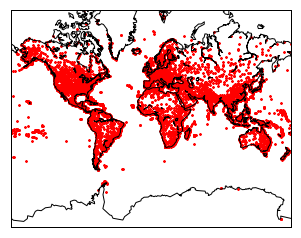

In [39]:
# Now actually plot the thing

x, y = m(
    [l[0] for l in coords],
    [l[1] for l in coords]
)

m.scatter(
    x,
    y,
    1,
    marker = 'o',
    color = 'red'
)

plt.show()

In [40]:
# Order is restored - we are reading into dataframes

import pandas as pd
import sqlite3

conn = sqlite3.connect("flights.db")
df = pd.read_sql_query("SELECT * FROM airlines LIMIT 5;", conn)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [41]:
df["country"]

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

In [42]:
# going to use read_sql_query wrapper function

def run_query(query):
    return pd.read_sql_query(query, db) 

In [ ]:
# Now let's look at mapping all potential routes between our airports

query = '''
SELECT CAST(sa.longitude AS float) AS source_lon,
CAST
'''

routes = run_query(query)